Dataset shape: (545, 13)

First few rows:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
Rang

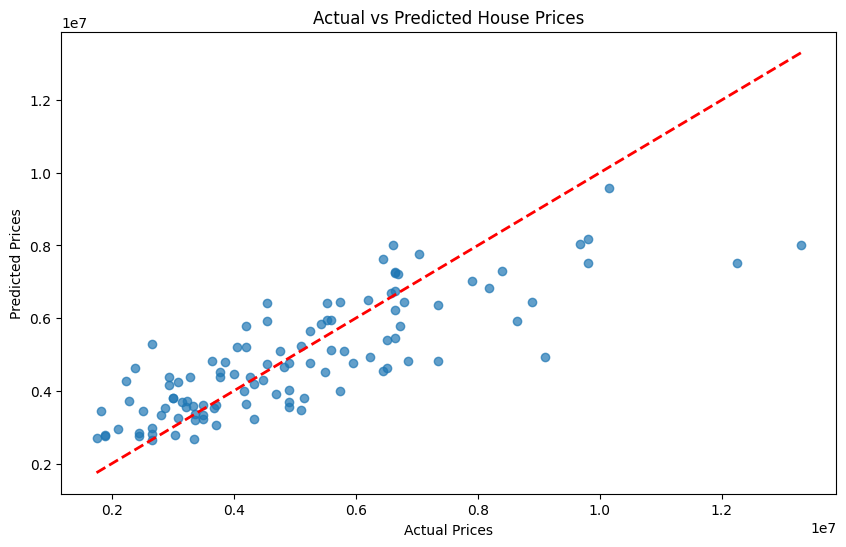

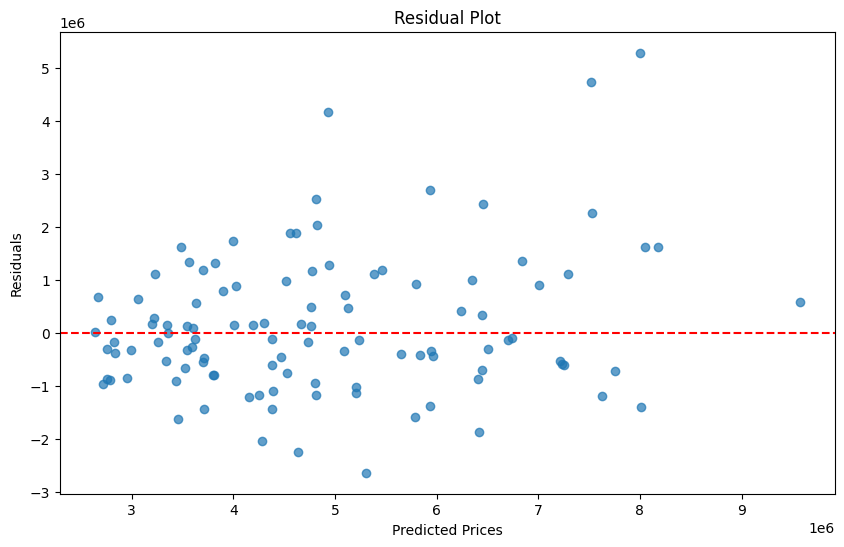


Example Prediction:
Actual price: 4,060,000.00
Predicted price: 5,203,691.71
Difference: 1,143,691.71


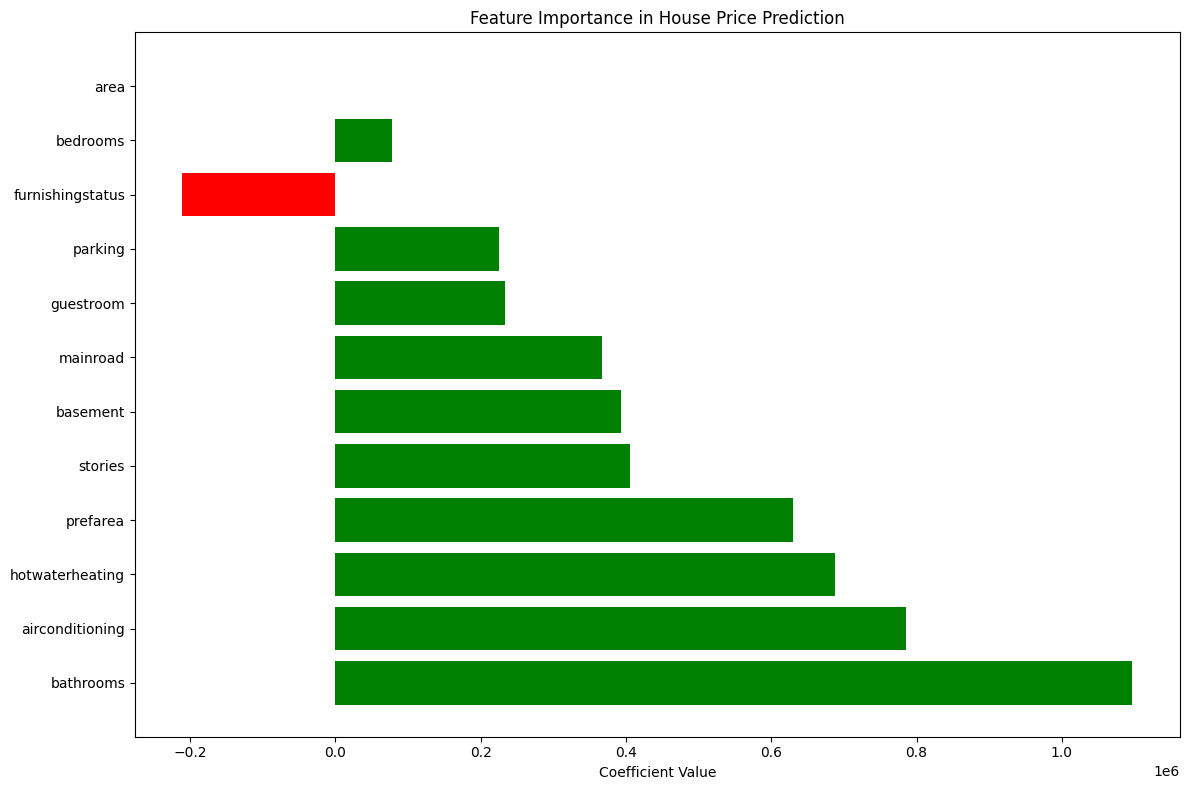

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Housing.csv')

# Display basic information about the dataset
print("Dataset shape:", data.shape)
print("\nFirst few rows:")
print(data.head())
print("\nDataset info:")
print(data.info())

# Preprocess categorical variables
# Convert yes/no columns to 1/0
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_columns:
    data[col] = data[col].map({'yes': 1, 'no': 0})

# Convert furnishingstatus using label encoding
le = LabelEncoder()
data['furnishingstatus'] = le.fit_transform(data['furnishingstatus'])

print("\nAfter preprocessing:")
print(data.head())

# Prepare features and target variable
X = data.drop('price', axis=1)  # Features
y = data['price']  # Target variable

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
print(f"R-squared (R²): {r2:.4f}")

# Display coefficients
print("\nFeature Coefficients:")
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_
}).sort_values('coefficient', key=abs, ascending=False)

print(feature_importance)

# Intercept
print(f"\nIntercept: {model.intercept_:,.2f}")

# Visualize actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Example prediction
print("\nExample Prediction:")
sample_idx = 0
sample_features = X_test.iloc[sample_idx:sample_idx+1]
actual_price = y_test.iloc[sample_idx]
predicted_price = model.predict(sample_features)[0]

print(f"Actual price: {actual_price:,.2f}")
print(f"Predicted price: {predicted_price:,.2f}")
print(f"Difference: {abs(actual_price - predicted_price):,.2f}")

# Feature importance visualization
plt.figure(figsize=(12, 8))
colors = ['green' if x > 0 else 'red' for x in feature_importance['coefficient']]
plt.barh(feature_importance['feature'], feature_importance['coefficient'], color=colors)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in House Price Prediction')
plt.tight_layout()
plt.show()